In [1]:
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [5]:
df = pd.read_csv("student_grades.csv")

In [6]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [7]:
df.shape

(104, 5)

In [13]:
dfdes = df.describe()
dfdes

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [28]:
IQR = dfdes.iloc[-2, 1:] - dfdes.iloc[-4, 1:]
IQR

exam1          22.0
exam2          19.0
exam3          16.0
final_grade    21.0
dtype: float64

In [29]:
score_range = dfdes.iloc[-1, 1:] - dfdes.iloc[3, 1:]
score_range

exam1          43.0
exam2          28.0
exam3          26.0
final_grade    32.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          104 non-null int64
exam2          104 non-null int64
exam3          104 non-null int64
final_grade    104 non-null int64
dtypes: int64(5)
memory usage: 4.1 KB


In [10]:
print(df.isnull().sum())

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


In [31]:
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1', 'exam2', 'exam3', 'final_grade'], 
                    var_name='grade_type', value_name='score')
df_melted.head()                    

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


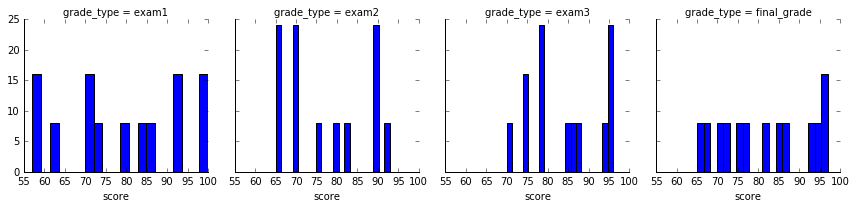

In [32]:
grid = sns.FacetGrid(df_melted, col='grade_type', margin_titles=True)
grid.map(plt.hist, 'score', bins=20)

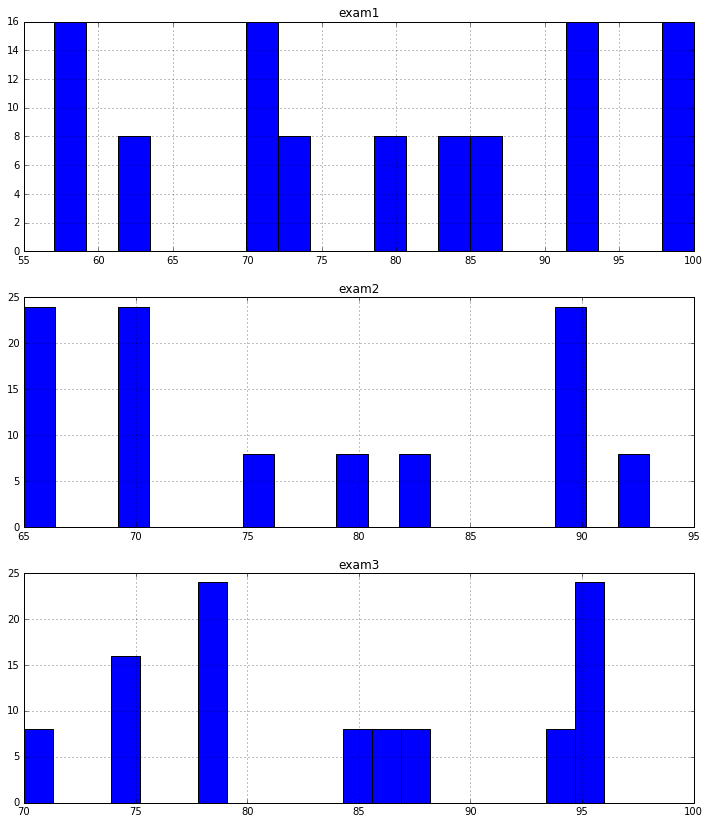

In [38]:
# Write a for loop to plot each of the 3 features (exam 1, 2, & 3) with the final grade using a joint plot. 
# What can you say about each relationship (using pearson's r and the p-value)
plt.figure(figsize=(12,14))
for i, col in enumerate(['exam1', 'exam2', 'exam3']):
    plot_number = i + 1
    series = df[col]
    plt.subplot(3, 1, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


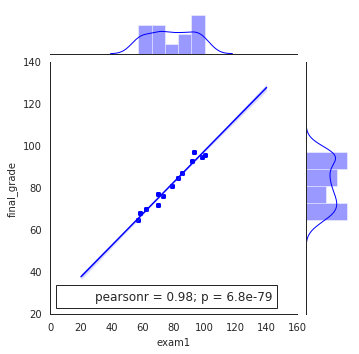

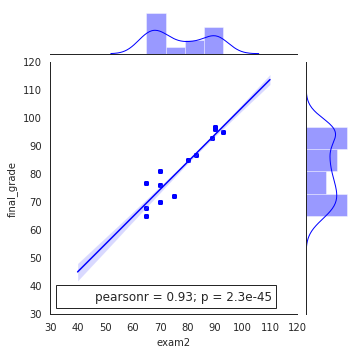

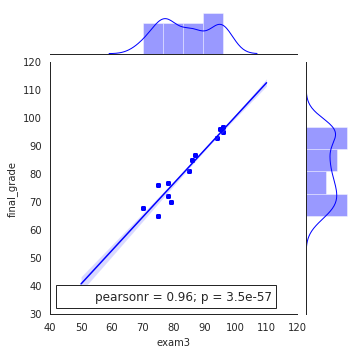

In [53]:
for i, col in enumerate(['exam1', 'exam2', 'exam3']):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = df[col]
        j = sns.jointplot(df[col], 'final_grade', data=df, kind='reg', height=5)
        j.annotate(stats.pearsonr)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


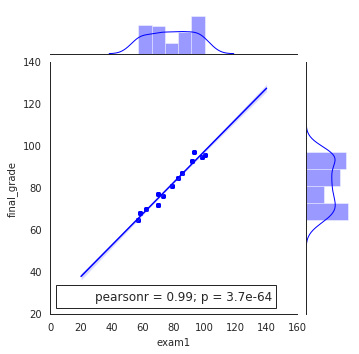

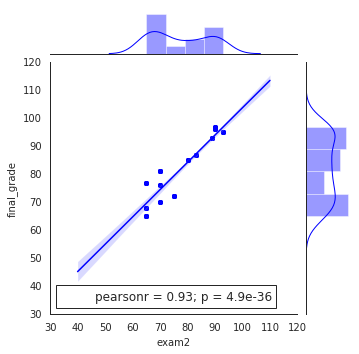

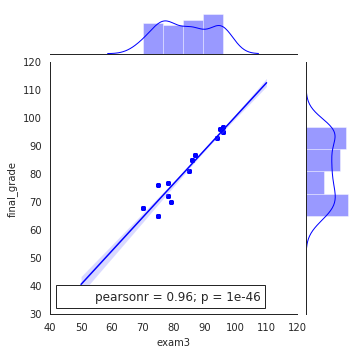

In [55]:
for i, col in enumerate(['exam1', 'exam2', 'exam3']):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = train[col]
        j = sns.jointplot(train[col], 'final_grade', data=train, kind='reg', height=5)
        j.annotate(stats.pearsonr)

In [44]:
X = df.drop(['final_grade', 'student_id'], axis=1)
y = df[['final_grade']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print(train.head())
print(test.head())

    exam1  exam2  exam3  final_grade
68     83     80     86           85
3      83     80     86           85
74     62     70     79           70
82     93     90     96           97
75     58     65     70           68
    exam1  exam2  exam3  final_grade
26    100     90     95           96
61     62     70     79           70
2      85     83     87           87
62     58     65     70           68
85     73     70     75           76


In [59]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE equal')
else:
    print('X & y train rows are NOT equal')
    
if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE equal')
else:
    print('X & y train rows are NOT equal')
    
if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test are NOT equal")
    
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split : %.2f' % train_split)
print('Test Split : %.2f' % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split : 0.80
Test Split : 0.20


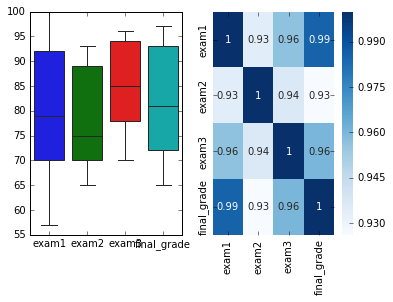

In [58]:
# Find a way to plot the boxplot & heatmap from section 6 side by side.
# plt.suptitle('Box and Heat Plots')

fig, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(data=df.drop(columns=['student_id']), ax=ax1)
sns.heatmap(train.corr(), cmap='Blues', annot=True, ax=ax2)
plt.show()


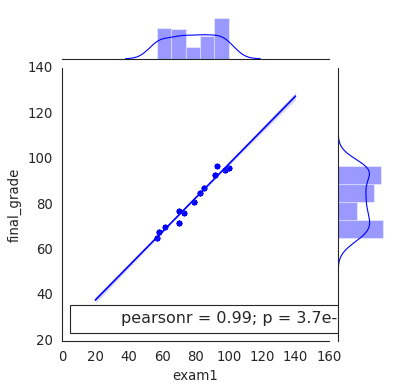

In [95]:
with sns.axes_style('white'):
    j = sns.jointplot("exam1", "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

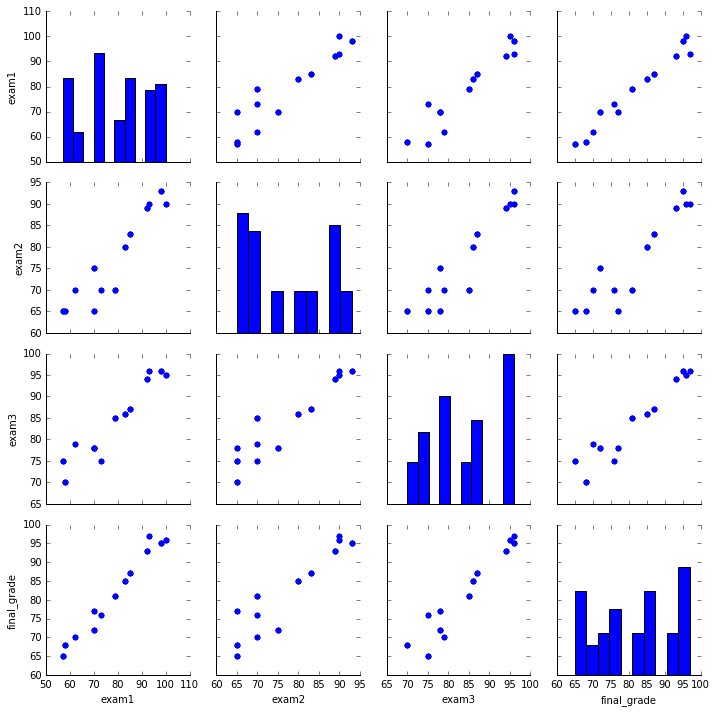

In [61]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

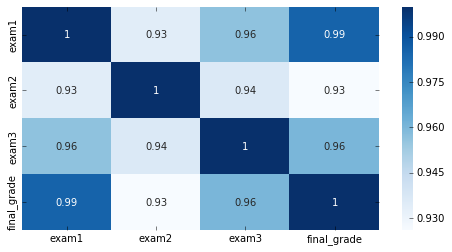

In [62]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [96]:
pearsonr(X_train[['exam1']], y_train)

(array([0.98548827]), array([3.67959731e-64]))

In [97]:
[[column, pearsonr(train[column], train.final_grade)] for column in X_train]

[['exam1', (0.9854882734738365, 3.679597306767771e-64)],
 ['exam2', (0.9260773842724218, 4.9387065956533756e-36)],
 ['exam3', (0.9604227932900589, 1.0003417783597307e-46)]]

In [98]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.final_grade) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'exam1': (0.9854882734738365, 3.679597306767771e-64),
 'exam2': (0.9260773842724218, 4.9387065956533756e-36),
 'exam3': (0.9604227932900589, 1.0003417783597307e-46)}

In [99]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        14:28:57   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [101]:
lm1.fit(X_train[['exam1']], y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [102]:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

[22.88211318]


In [103]:
lm1_coefficients = lm1.coef_
print(lm1_coefficients)

[[0.74850854]]


In [105]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): 22.88
    coefficient (m): 0.75



In [107]:
y_pred_lm1 = lm1.predict(X_train[['exam1']])

In [108]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print('lm1\n mse: {:.3}'.format(mse_lm1))

lm1
 mse: 3.37


In [110]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print(' {:.2%} of the variance in the student\'s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

 97.12% of the variance in the student's final grade can be explained by the grade on the first exam.


In [111]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [112]:
lm2.fit(X_train[['exam1', 'exam3']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [113]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[12.79518052]
[[0.59709165 0.26106586]]


In [115]:
print('Multivariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])

Multivariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 12.80
    coefficient (m1): 0.60
    coefficient (m2): 0.26


In [130]:
# Fit, predict, and evaluate one more model, lm3, using exam 3 only.
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [131]:
lm3.fit(X_train[['exam3']], y_train)
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [132]:
lm3_y_intercept= lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

[-19.62667326]
[[1.20315159]]


In [133]:
print('Univariate - final_exam = b + m * exam3')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0])
print()

Univariate - final_exam = b + m * exam3
    y-intercept (b): -19.63
    coefficient (m): 1.20



In [135]:
y_pred_lm3 = lm3.predict(X_train[['exam3']])

In [138]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3)) 

lm3
  mse: 9.08


In [ ]:
# How does the result of the model compare to the other two? Which should you use, based on these results?
# lm3 has a much higher mse, which indicates that lm2 is still a much better option.

In [116]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))

In [117]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print('lm2\n mse:{:.3}'.format(mse_lm2))

lm2
 mse:2.94


In [121]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student\'s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

  97.49% of the variance in the student's final grade can be explained by the grades on exam 1 and 3.


In [139]:
# Predict final grades of the out-of-sample data (test dataframe) and evaluate results.
y_test_pred_lm2 = lm2.predict(X_test.drop(columns=['exam2']))

In [140]:
mse_test_lm2 = mean_squared_error(y_test, y_test_pred_lm2)
print('test_lm2\n mse:{:.3}'.format(mse_test_lm2))

test_lm2
 mse:3.42


In [141]:
r2_test_lm2 = r2_score(y_test, y_test_pred_lm2)
print('  {:.2%} of the variance in the student\'s final grade can be explained by the grades on exam 1 and 3.'.format(r2_test_lm2))

  97.20% of the variance in the student's final grade can be explained by the grades on exam 1 and 3.


In [143]:
y_test_pred_lm1 = lm1.predict(X_test[['exam1']])

In [144]:
mse_test_lm1 = mean_squared_error(y_test, y_test_pred_lm1)
print('test_lm1\n mse:{:.3}'.format(mse_test_lm1))

test_lm1
 mse:4.75


In [147]:
r2_test_lm1 = r2_score(y_test, y_test_pred_lm1)
print('  {:.2%} of the variance in the student\'s final grade can be explained by the grades on exam 1 and 3.'.format(r2_test_lm1))

  96.12% of the variance in the student's final grade can be explained by the grades on exam 1 and 3.


In [145]:
y_test_pred_lm3 = lm3.predict(X_test[['exam3']])

In [146]:
mse_test_lm3 = mean_squared_error(y_test, y_test_pred_lm3)
print('test_lm3\n mse:{:.3}'.format(mse_test_lm3))

test_lm3
 mse:12.1


In [148]:
r2_test_lm3 = r2_score(y_test, y_test_pred_lm3)
print('  {:.2%} of the variance in the student\'s final grade can be explained by the grades on exam 1 and 3.'.format(r2_test_lm3))

  90.07% of the variance in the student's final grade can be explained by the grades on exam 1 and 3.


In [ ]:
# Which model performs the best, based on the 2 out-of-sample evaluation results (the example one, lm1, and the 
# exercise one, lm3, from the above exercise).
# lm1 performed better with the test data than lm3.  lm1 has both a smaller mse and a higher r2_score.

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

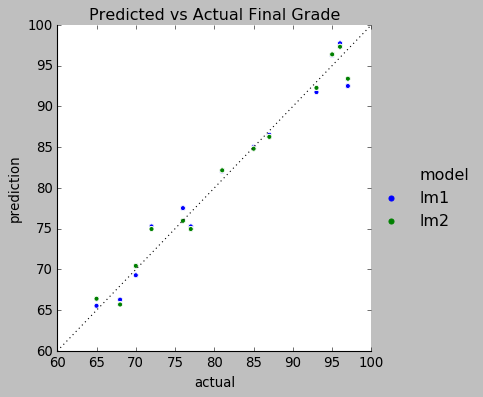

In [128]:
pd.DataFrame({'actual': y_train.final_grade,
             'lm1' : y_pred_lm1.ravel(),
             'lm2' : y_pred_lm2.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60,100], [60, 100], c='black', ls=':')
plt.ylim(60,100)
plt.xlim(60,100)
plt.title('Predicted vs Actual Final Grade')